<a href="https://colab.research.google.com/github/dannynacker/strobe_entrainment_periodicity_MSc/blob/main/dynamic_resonance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

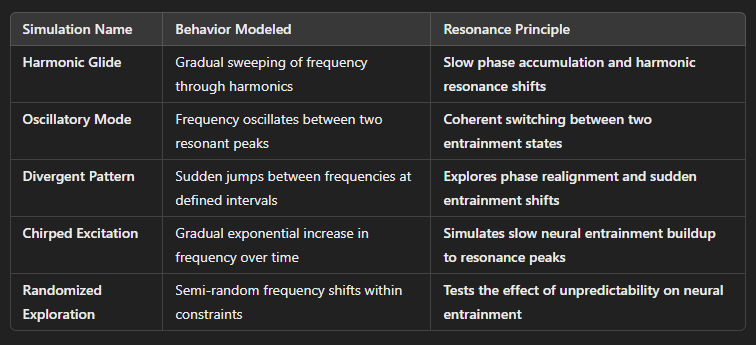

Try this one below ...

Generated yHG_Sq.txt
Generated yHG_Si.txt
Generated yOM_Sq.txt
Generated yOM_Si.txt
Generated yDP_Sq.txt
Generated yDP_Si.txt
Generated yCE_Sq.txt
Generated yCE_Si.txt
Generated yRE_Sq.txt
Generated yRE_Si.txt


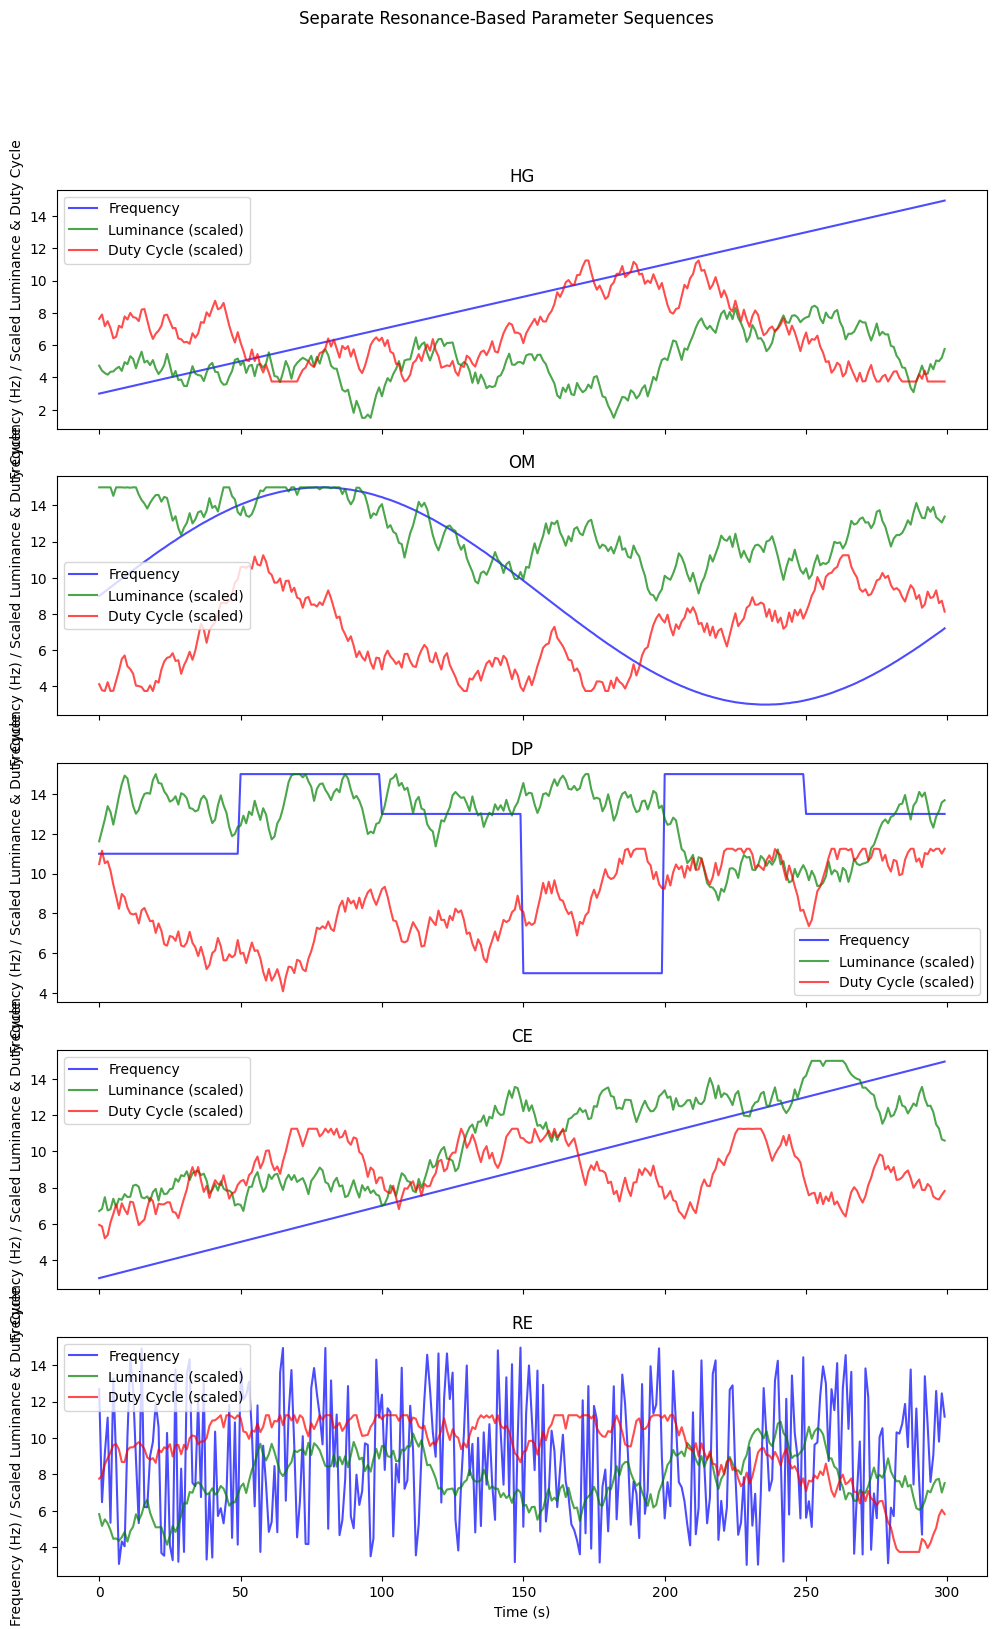

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Session parameters
session_duration = 300  # 5 minutes (300 seconds)
time_step = 1.0  # 1s resolution
num_steps = int(session_duration / time_step)

# Parameter constraints
frequency_range = (3, 15)  # Hz
luminance_range = (10, 100)  # Arbitrary units
duty_cycle_range = (25, 75)  # Percentage
max_freq_jump_ratio = 2.2  # Maximum step size ratio for frequency shifts

# Generate different resonance-based sequences

def generate_sequence(mode):
    time = np.arange(0, session_duration, time_step)
    frequency = np.zeros(num_steps)
    luminance = np.zeros(num_steps)
    duty_cycle = np.zeros(num_steps)

    # Ensure full range exploration
    freq = np.random.uniform(*frequency_range)
    lum = np.random.uniform(*luminance_range)
    duty = np.random.uniform(*duty_cycle_range)

    for i in range(num_steps):
        progress = i / num_steps
        if mode == "harmonic_glide":
            freq = 3 + 12 * progress  # Sweep through full frequency range
        elif mode == "oscillatory_mode":
            freq = 9 + 6 * np.sin(i / 50)  # Oscillates within range
        elif mode == "divergent_pattern":
            if i % 50 == 0:
                freq = np.random.choice(np.linspace(3, 15, 7))
        elif mode == "chirped_excitation":
            freq = 3 * (1 + progress * 4)  # Exponentially rising pattern
        elif mode == "randomized_exploration":
            freq = np.random.uniform(*frequency_range)

        freq = np.clip(freq, *frequency_range)
        lum = np.clip(lum + np.random.uniform(-5, 5), *luminance_range)
        duty = np.clip(duty + np.random.uniform(-5, 5), *duty_cycle_range)

        frequency[i] = round(freq, 2)
        luminance[i] = lum
        duty_cycle[i] = duty

    return pd.DataFrame({
        "Time (s)": time.astype(int),
        "Frequency (Hz)": frequency,
        "Luminance": luminance,
        "Duty Cycle (%)": duty_cycle
    })

# Generate all sequences
base_sequences = {
    "HG": generate_sequence("harmonic_glide"),
    "OM": generate_sequence("oscillatory_mode"),
    "DP": generate_sequence("divergent_pattern"),
    "CE": generate_sequence("chirped_excitation"),
    "RE": generate_sequence("randomized_exploration"),
}

# Create 10 total sequences (5 square wave, 5 sine wave)
strobe_sequences = {}
for mode, df in base_sequences.items():
    strobe_sequences[f"y{mode}_Sq"] = df.copy()
    strobe_sequences[f"y{mode}_Si"] = df.copy()

# Generate STP-compatible output
def format_strobe_sequence(df, wave_type):
    output = []
    output.append(f'TIM"00:00:{session_duration:02}.0"')
    output.append(f'DUR"{session_duration:.1f}"')

    for _, row in df.iterrows():
        step_duration = 1.0
        start_freq = row["Frequency (Hz)"]
        end_freq = row["Frequency (Hz)"]
        start_l = row["Luminance"]
        end_l = row["Luminance"]
        start_d = row["Duty Cycle (%)"]
        end_d = row["Duty Cycle (%)"]

        stp_line = f'STP"{step_duration:.1f},{wave_type},{start_freq:.2f},{end_freq:.2f},{start_d},{end_d},1,1,1,1,{start_l},{end_l}"'
        output.append(stp_line)

    return "\r\n".join(output)

# Save to properly formatted .txt files
for mode, df in strobe_sequences.items():
    wave_type = 1 if "Sq" in mode else 2  # 1 = Square, 2 = Sine
    strobe_data = format_strobe_sequence(df, wave_type)
    filename = f"{mode}.txt"
    with open(filename, "w", encoding="utf-8") as f:
        f.write(strobe_data)
    print(f"Generated {filename}")

# Create separate plots for each sequence
fig, axes = plt.subplots(5, 1, figsize=(12, 18), sharex=True)

colors = {
    "Frequency": "blue",
    "Luminance": "green",
    "Duty Cycle (%)": "red"
}

for ax, (mode, df) in zip(axes, base_sequences.items()):
    ax.plot(df["Time (s)"], df["Frequency (Hz)"], label="Frequency", color=colors["Frequency"], alpha=0.7)
    ax.plot(df["Time (s)"], df["Luminance"] / 100 * 15, label="Luminance (scaled)", color=colors["Luminance"], alpha=0.7)
    ax.plot(df["Time (s)"], df["Duty Cycle (%)"] / 100 * 15, label="Duty Cycle (scaled)", color=colors["Duty Cycle (%)"], alpha=0.7)
    ax.set_ylabel("Frequency (Hz) / Scaled Luminance & Duty Cycle")
    ax.set_title(mode)
    ax.legend()

plt.xlabel("Time (s)")
plt.suptitle("Separate Resonance-Based Parameter Sequences")
plt.show()


HG: Slow phase alignment & entrainment buildup.
OM: Cyclic phase realignment for stronger coherence.
DP: Sudden shifts for phase-reset-based entrainment.
CE: Gradual nonlinear increases for sustained coherence.
RE: Stochastic exploration of resonance states.